<a href="https://colab.research.google.com/github/mateosuster/nlpPapers/blob/main/code/05_LDA_TopicModels_GENSIM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencias

In [1]:
%%capture
!pip install pyLDAvis==2.1.2

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from collections import Counter


from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim import corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

# Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/data_clean.csv")

dataset = data.text.tolist()
dataset[0]

'used think output translation machine would stylistically inelegant would tolerable message got across find getting message across accurately difficult may able stylistic elegance output since much style reflects depth phenomena thus systematic example order clauses many twoclause sentences reversed without change meaning normally true sentences two clauses meaning usually changes clause order changed equivalently appear severe restrictions clause order given meaning restrictions appear follow depth considerations idea investigated normal clause order deviations order must signalled special syntactic semantic devices nature devices explored translating sentences may trouble due fact clause types two languages exactly parallel therefore list allowed preferred clause orders two languages equivalent special syntactic semantic devices available signal deviations normal order different thus one would predict sentences language often split two sentences translated language time sentences la

In [3]:
type(dataset)

list

# Preproc

In [4]:
texts = [word_tokenize(str(doc)) for doc in dataset]

print(texts[0])
'translation' in texts[0]

['used', 'think', 'output', 'translation', 'machine', 'would', 'stylistically', 'inelegant', 'would', 'tolerable', 'message', 'got', 'across', 'find', 'getting', 'message', 'across', 'accurately', 'difficult', 'may', 'able', 'stylistic', 'elegance', 'output', 'since', 'much', 'style', 'reflects', 'depth', 'phenomena', 'thus', 'systematic', 'example', 'order', 'clauses', 'many', 'twoclause', 'sentences', 'reversed', 'without', 'change', 'meaning', 'normally', 'true', 'sentences', 'two', 'clauses', 'meaning', 'usually', 'changes', 'clause', 'order', 'changed', 'equivalently', 'appear', 'severe', 'restrictions', 'clause', 'order', 'given', 'meaning', 'restrictions', 'appear', 'follow', 'depth', 'considerations', 'idea', 'investigated', 'normal', 'clause', 'order', 'deviations', 'order', 'must', 'signalled', 'special', 'syntactic', 'semantic', 'devices', 'nature', 'devices', 'explored', 'translating', 'sentences', 'may', 'trouble', 'due', 'fact', 'clause', 'types', 'two', 'languages', 'exa

True

## Ajuste para LDA

Documentacion de filter_extremes: https://tedboy.github.io/nlps/generated/generated/gensim.corpora.Dictionary.filter_extremes.html 

In [5]:
dictionary = corpora.Dictionary(texts) # asocia cada palabra con un ID
print(len(dictionary))

dictionary.filter_extremes(no_below=10, no_above=0.5) #filtra palabras con frecuencia menor a no_below (absoluto) y mayor a no_above (fraccion)
print(len(dictionary))

37032
7924



por cada texto en el dataset, le pasamos un conversor a bag of words: el documento # tiene n palabras de ID_i, ID_j, etc.

esto es mas economico dado que permite  reducir la esparcidad de la matriz 

In [6]:
corpus = [dictionary.doc2bow(text) for text in texts] 

## LSI y LDA

In [7]:
semilla = 420

# before training/inference:
np.random.seed(semilla)

In [8]:
lsamodel = LsiModel(corpus=corpus, num_topics=25, id2word=dictionary 
                    # ,random_seed=semilla
                    )

In [9]:
lsamodel.print_topics(10,4)


[(0, '-0.681*"de" + -0.278*"la" + -0.275*"des" + -0.235*"les"'),
 (1, '0.295*"language" + 0.260*"model" + 0.226*"data" + 0.221*"models"'),
 (2,
  '0.583*"translation" + -0.371*"model" + -0.300*"models" + 0.235*"system"'),
 (3,
  '0.529*"translation" + -0.352*"corpus" + 0.338*"model" + -0.304*"language"'),
 (4, '0.752*"language" + 0.256*"models" + -0.199*"corpus" + -0.162*"system"'),
 (5, '0.779*"data" + -0.351*"word" + 0.206*"training" + -0.171*"language"'),
 (6, '-0.565*"word" + 0.363*"system" + 0.304*"task" + -0.291*"data"'),
 (7, '-0.674*"model" + -0.450*"corpus" + 0.231*"task" + 0.212*"models"'),
 (8, '-0.610*"models" + -0.326*"corpus" + 0.309*"model" + 0.288*"system"'),
 (9, '0.326*"models" + 0.323*"corpus" + -0.322*"information" + 0.306*"task"')]

In [10]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary, iterations = 2000, passes=10,
                    random_state=semilla)


In [11]:
ldamodel.print_topics(10, 8)

[(0,
  '0.125*"et" + 0.066*"predicting" + 0.047*"al" + 0.045*"opinion" + 0.022*"macro" + 0.020*"completion" + 0.020*"st" + 0.020*"simplification"'),
 (1,
  '0.019*"dataset" + 0.016*"knowledge" + 0.014*"social" + 0.013*"graph" + 0.012*"reasoning" + 0.012*"transformer" + 0.010*"bias" + 0.010*"media"'),
 (2,
  '0.072*"de" + 0.029*"la" + 0.028*"des" + 0.026*"les" + 0.022*"et" + 0.019*"le" + 0.018*"un" + 0.017*"une"'),
 (3,
  '0.024*"word" + 0.018*"task" + 0.016*"features" + 0.015*"embeddings" + 0.014*"classification" + 0.013*"words" + 0.013*"analysis" + 0.012*"detection"'),
 (4,
  '0.021*"semantic" + 0.020*"information" + 0.019*"entity" + 0.016*"extraction" + 0.015*"relations" + 0.014*"knowledge" + 0.013*"relation" + 0.012*"entities"'),
 (5,
  '0.023*"model" + 0.019*"task" + 0.013*"models" + 0.012*"neural" + 0.012*"translation" + 0.011*"results" + 0.010*"system" + 0.009*"performance"'),
 (6,
  '0.036*"models" + 0.024*"data" + 0.022*"model" + 0.019*"language" + 0.019*"learning" + 0.017*"tra

# Save models

In [35]:
import os
from google.colab import files
from gensim.test.utils import datapath

# Save models to disk.
temp_file = datapath("/content/lsa")
lsamodel.save(temp_file)

temp_file = datapath("/content/lda")
ldamodel.save(temp_file)

# Dowload models
path = "/content"
dir_list = os.listdir(path)

for i in dir_list:
  if 'lsa' in i or 'lda' in i  :
    print('downloading')
    files.download(path + i)


downloading


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloading


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloading


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloading


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
dir_list

['.config',
 'lsa',
 'lda.state',
 'lda',
 'lda.expElogbeta.npy',
 'lsa.projection',
 'lda.id2word',
 'sample_data']

## Visualizacion de los topicos

lambda 
* cercano a 1 muestra las palabras mas probables de cada topico
* cercano a 0 muestra las palabras mas especificas de cada topico (palabras raras, altamente probables en ese topico y poco probables en los otros). Son palabras muy asociados al topico y son palabras poco probables. Serian palabras diferencialmente mas probables para del topico (pueden ser palabras poco proablbes para el topico pq son poco proablabes en si)´


el grafico de la izquierda muestra los topicos distribuidos espacialmente segun si tienen palabras parecidas

In [12]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.155788  0.022317       1        1  21.098307
9     -0.107617 -0.030677       2        1  15.928407
8     -0.119269  0.045043       3        1  13.657366
6     -0.155190  0.062645       4        1  12.283210
2      0.371226  0.123339       5        1   9.573583
3     -0.129672 -0.013468       6        1   9.009664
4     -0.106712 -0.000086       7        1   8.206111
1     -0.082149  0.112763       8        1   6.452083
7      0.133042 -0.412314       9        1   3.138410
0      0.352127  0.090438      10        1   0.652860, topic_info=            Term          Freq         Total Category  logprob  loglift
279           de   9619.000000   9619.000000  Default  30.0000  30.0000
286           et   4135.000000   4135.000000  Default  29.0000  29.0000
1296      models  10551.000000  10551.000000  Default  28.0000  28.0000
354        model  11690.000000  11690.000000  Default  27.0000  27.0000
290           la   3842.000000   3842.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
286           et   1141.900412   4135.468946  Topic10  -2.0790   3.7447
3453          si     97.130005    216.065287  Topic10  -4.5434   4.2320
2158  diagnostic     62.043831    120.023919  Topic10  -4.9916   4.3717
3103          id     55.144765     95.521679  Topic10  -5.1095   4.4822
7895         ood     51.015381    149.322951  Topic10  -5.1873   3.9576

[660 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6415      1  0.994811  ablation
6417     10  0.985432     abuse
7510      8  0.992640   abusive
2248      1  0.754988  achieves
2248      4  0.220558  achieves
...     ...       ...       ...
548       7  0.084614      work
548       8  0.109043      work
548       9  0.000444      work
3938      6  0.992230       wsd
3834      7  0.992242      zero

[1362 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 9, 7, 3, 4, 5, 2, 8, 1])

## Distribucion de los topicos por año

Para un documento en particular

In [13]:
new_text = dataset[0]

# transform held_out_text into the bag-of-words space
bow_vector = dictionary.doc2bow(word_tokenize(new_text))
lda_vector = ldamodel[bow_vector]
print(lda_vector) # imprime las probabilidades de cada topico

# print the document's single most prominent LDA topic (palabras mas frecuentes de topico mas probable )
print(ldamodel.print_topic(max(lda_vector, key=lambda item: item[1])[0]))

[(3, 0.34036872), (4, 0.0924002), (7, 0.068607666), (8, 0.27132958), (9, 0.22335625)]
0.024*"word" + 0.018*"task" + 0.016*"features" + 0.015*"embeddings" + 0.014*"classification" + 0.013*"words" + 0.013*"analysis" + 0.012*"detection" + 0.012*"sentiment" + 0.009*"information"


Cargo todos los papers y corro el LDA sobre ellos y Aplico el mismo preprocesamiento


In [14]:
papers = pd.read_csv('https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/ACL_data.csv')

STOP_WORDS_en = stopwords.words("english")

STOP_WORDS_fr = stopwords.words("french")
STOP_WORDS = STOP_WORDS_fr + STOP_WORDS_en

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS_en and word.isalpha() and len(word)>1]
    
papers_text  = [tokenize(str(doc).lower()) for doc in papers.ABSTRACT]
papers_text_df = pd.DataFrame([' '.join(text) for text in papers_text], columns = ['text'])

papers_text_df

,text
0,text worlds virtual environments embodied agen...
1,prototype system playing minimal improvisation...
2,characters npcs significantly enhance player e...
3,interactive question answering iqa requires in...
4,purpose extended abstract discuss possible fru...
...,...
33806,paper deals problem representing useful form w...
33807,becomes evident successful pragmatics automati...
33808,establishing grammatical description language ...
33809,grammar based upon conventional morphemic anal...


In [15]:
results = []

for text_i in papers_text_df.text:

  # transform held_out_text into the bag-of-words space
  bow_vector = dictionary.doc2bow(word_tokenize(str(text_i)))
  lda_vector_i = ldamodel[bow_vector]

  # converting to dict
  result = dict(lda_vector_i)
  results.append(result)

topics_dis = pd.DataFrame(results)
topics_dis['year'] = papers.YEAR 
topics_dis = topics_dis.melt(id_vars = 'year', var_name='topic', value_name='prob')
topics_dis

,year,topic,prob
0,2022,0,0.015069
1,2022,0,NaN
2,2022,0,0.014138
3,2022,0,NaN
4,2022,0,NaN
...,...,...,...
338105,1963,7,NaN
338106,1963,7,0.198032
338107,1963,7,0.062229
338108,1963,7,0.054126


In [18]:
topics_dis_agg = topics_dis.groupby(['year', 'topic' ], as_index= False).agg(
    {'prob' : ['mean', 'median', 'std', 'count'] }
     )

topics_dis_agg.column = ['year', 'topic' , 'prob_mean', 'prob_median', 'std', 'count' ]
topics_dis_agg = topics_dis_agg.reset_index()
topics_dis_agg.columns

MultiIndex([('index',       ''),
            ( 'year',       ''),
            ('topic',       ''),
            ( 'prob',   'mean'),
            ( 'prob', 'median'),
            ( 'prob',    'std'),
            ( 'prob',  'count')],
           )

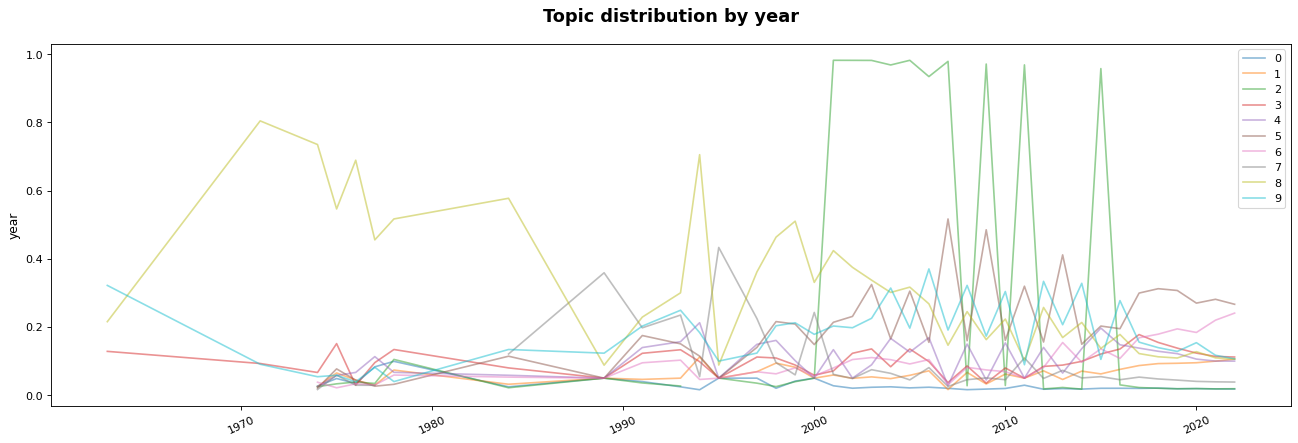

In [21]:
fig = plt.figure(figsize=(20, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)

plt.ylabel("year", fontsize=11)
plt.xticks(rotation=25)  # Rotates X-Axis Ticks by 45-degrees
# plt.xlabel('Days')

# displaying the title
plt.title(
    "Topic distribution by year", fontsize=16, fontweight="bold", pad=20
)
for i in topics_dis_agg.topic.unique():
    ax.plot(
        topics_dis_agg[topics_dis_agg["topic"] == i]["year"],
        topics_dis_agg[topics_dis_agg["topic"] == i]["prob", "median"],
        label=(i),
        # color="green",
        # color="#e41a1c",
        alpha=0.5,
    )

ax.legend()
plt.show()

In [ ]:
topics_dis_agg.to_csv('topic_distribution_year.csv', index = False)

# Comparacion LDA y LSA

In [ ]:
# palabras mas frecuentes para cada topico
lsatopics  = [[word for word, prob in topic] for topicid, topic in lsamodel.show_topics(10,formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(10,formatted=False)]

In [ ]:
ldatopics[0]

['task',
 'classification',
 'social',
 'text',
 'extraction',
 'news',
 'media',
 'information',
 'event',
 'events']

In [ ]:
# with only train papers (sample)
lsa_coherence = CoherenceModel(topics=lsatopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()

# with all papers
# lsa_coherence = CoherenceModel(topics=lsatopics, texts=papers_text, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()
# lda_coherence = CoherenceModel(topics=ldatopics, texts=papers_text, dictionary=dictionary, window_size=30,coherence='c_npmi',topn=5).get_coherence_per_topic()

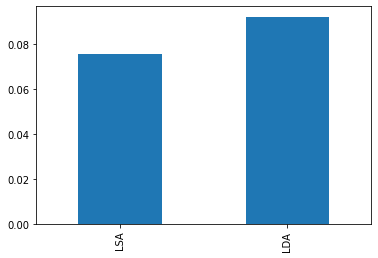

In [ ]:
df_lda = pd.DataFrame([range(10),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
df_lsa = pd.DataFrame([range(10),lsa_coherence,lsatopics],index=['topic_id','coherence','topic']).transpose()
pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence)}).plot.bar();

In [ ]:
df_lda.sort_values(by='coherence',ascending=False)

,topic_id,coherence,topic
1,1,0.555057,"[de, des, la, les, et, transformer, le, un, en..."
4,4,0.184648,"[translation, machine, evaluation, systems, qu..."
6,6,0.095622,"[semantic, word, words, information, relations..."
3,3,0.084426,"[dialogue, speech, user, human, users, system,..."
0,0,0.071822,"[task, classification, social, text, extractio..."
7,7,0.059421,"[bias, evidence, wikipedia, recurrent, claims,..."
8,8,0.056829,"[models, model, language, data, tasks, learnin..."
5,5,0.041655,"[language, corpus, data, annotation, research,..."
2,2,0.014946,"[task, system, paper, results, languages, usin..."
9,9,-0.242661,"[privacy, signals, extractive, prompts, legal,..."
